## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              86.15
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                   4.95e-106
Time:                        22:38:19   Log-Likelihood:                         -310.17
No. Observations:                 404   AIC:                                      646.3
Df Residuals:                     391   BIC:                                      698.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

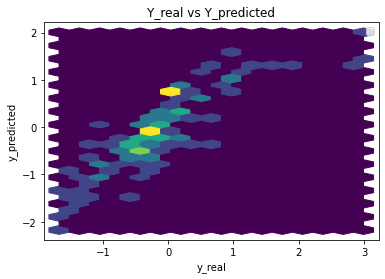

Performance Metrics
Mean Squared Error: 0.21925836529813478
Mean Absolute Error: 0.3540426953294955
Manhattan distance: 36.11235492360852
Euclidean distance: 4.729096452855424


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.15624034146012827


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215
0:	learn: 0.9559660	total: 62.8ms	remaining: 1m 2s
1:	learn: 0.9366463	total: 63.8ms	remaining: 31.8s
2:	learn: 0.9183564	total: 64.5ms	remaining: 21.4s
3:	learn: 0.9021943	total: 65.2ms	remaining: 16.2s
4:	learn: 0.8870860	total: 65.9ms	remaining: 13.1s
5:	learn: 0.8731931	total: 66.6ms	remaining: 11s
6:	learn: 0.8572168	total: 67.3ms	remaining: 9.54s
7:	learn: 0.8418077	total: 68ms	remaining: 8.43s
8:	learn: 0.8267250	total: 68.7ms	remaining: 7.56s
9:	learn: 0.8111672	total: 69.3ms	remaining: 6.87s
10:	learn: 0.7968438	total: 70ms	remaining: 6.29s
11:	learn: 0.7830947	total: 70.7ms	remaining: 5.82s
12:	learn: 0.7687473	total: 71.3ms	remaining: 5.41s
13:	learn: 0.7536426	total: 72ms	remaining: 5.07s
14:	learn: 0.7395985	total: 72.8ms	remaining: 4.78s
15:	learn: 0.7261910	total: 73.4ms	remaining: 4.51s
16:	learn: 0.7134775	total: 74ms	remaining: 4.28s
17:	learn: 0.7017554	total: 74.7ms	remaining: 4.08s
18:	learn: 0.6897595	total: 75.4ms	remaining: 3.89s
19

## Vanilla Neural Network 

In [10]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.026649000165477
